https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Machine Failure.csv")
df.sample(8)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
175,47,5,3,5,7,1,58,3,12,0
88,31,2,3,4,6,6,20,4,6,1
31,64,3,4,4,2,1,60,2,3,0
557,40,1,5,3,5,4,28,5,19,1
815,640,7,5,3,6,4,37,7,22,0
402,0,0,2,2,6,1,21,5,16,0
197,2800,0,4,5,6,0,41,3,12,0
161,7300,3,5,3,6,1,19,4,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [5]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [6]:
df["fail"].value_counts()

fail
0    551
1    393
Name: count, dtype: int64

In [8]:
df.drop(columns = ["footfall"], inplace = True)

In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
X = df.drop("fail", axis = 1)
y = df['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)

In [101]:
rfr = RandomForestClassifier(class_weight = "balanced", n_jobs = -1)
param_grid = {
    "n_estimators" : [100, 150, 200, 250],
    "min_impurity_decrease" : [0.01, 0.02, 0.03],
    "criterion" : ["gini", "entropy"],
    "min_samples_split" : [2, 3, 4],
    "bootstrap" : [True, False]
}

rfr_cv = GridSearchCV(rfr, param_grid = param_grid, cv = 2, n_jobs = -1, scoring = "f1")
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_impurity_decrease': [0.01, 0.02, 0.03],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150, 200, 250]},
             scoring='f1')

<Axes: >

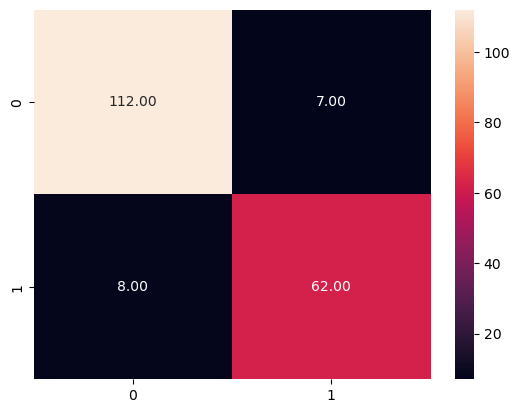

In [103]:
rfr_cv.best_score_
rfr_best = rfr_cv.best_estimator_
rfr_best.fit(X_train, y_train)
sns.heatmap(confusion_matrix(y_test, rfr_best.predict(X_test)), annot = True, fmt = ".2f")

In [17]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

E:\Anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<Axes: >

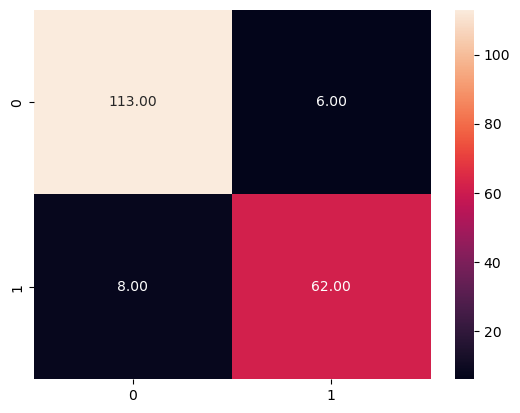

In [23]:
abc = AdaBoostClassifier(estimator = RandomForestClassifier(), n_estimators = 100)
abc.fit(X_train, y_train)
y_preds = abc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, fmt = ".2f")

<Axes: >

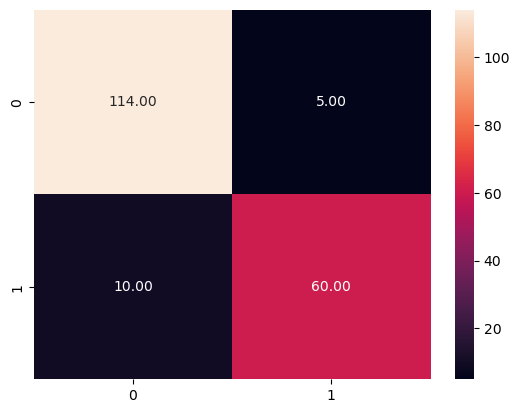

In [28]:
gbc = GradientBoostingClassifier(n_estimators = 100)
gbc.fit(X_train, y_train)
y_preds = gbc.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, fmt = ".2f")

<Axes: >

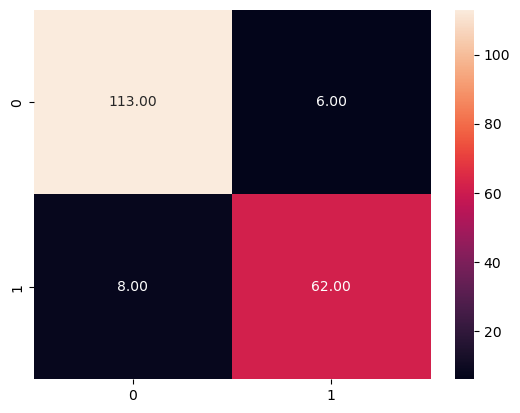

In [30]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_preds), annot = True, fmt = ".2f")

In [31]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier, BalancedBaggingClassifier, BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [78]:
estimators= [
    ("rbc", RUSBoostClassifier()),
    ("bbc", BalancedBaggingClassifier(estimator = SVC())),
    ("brfc", BalancedRandomForestClassifier()),
    ("cbc", CatBoostClassifier()),
    ('eec', EasyEnsembleClassifier()),
    ("svc", SVC()),
    ("gbc", GradientBoostingClassifier())
]

In [79]:
sc = StackingClassifier(estimators = estimators, final_estimator = RUSBoostClassifier(), n_jobs = -1)

In [81]:
estimators2 = [
    ("sc", sc),
    ("cb", CatBoostClassifier()),
    ("xgb", XGBClassifier()),
    ("lgbm", LGBMClassifier())
]

In [85]:
sc_final = StackingClassifier(estimators = estimators2, final_estimator = BalancedRandomForestClassifier(), n_jobs = -1)

In [86]:
sc_final.fit(X_train, y_train)

E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
E:\Anaconda\Lib\site-packages\imblearn\ensemble\_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


StackingClassifier(estimators=[('sc',
                                StackingClassifier(estimators=[('rbc',
                                                                RUSBoostClassifier()),
                                                               ('bbc',
                                                                BalancedBaggingClassifier(estimator=SVC())),
                                                               ('brfc',
                                                                BalancedRandomForestClassifier()),
                                                               ('cbc',
                                                                <catboost.core.CatBoostClassifier object at 0x0000016801A25BD0>),
                                                               ('eec',
                                                                EasyEnsembleClassifier()),
                                                               ('svc', SVC()),
                                                               ('gbc',
                                                                GradientBoostingClassifier())],
                                                   final_...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lgbm', LGBMClassifier())],
                   final_estimator=BalancedRandomForestClassifier(), n_jobs=-1)

<Axes: >

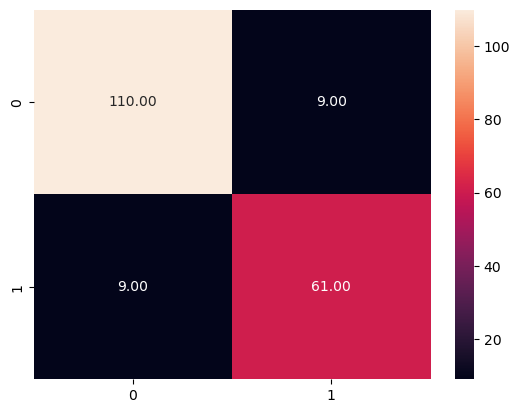

In [89]:
sns.heatmap(confusion_matrix(y_test, sc_final.predict(X_test)), annot = True, fmt = ".2f")

In [90]:
estimators_layer2 = [
        ("eec", EasyEnsembleClassifier(n_estimators = 100)),
    ("rbc", RUSBoostClassifier()),
    ("bbc", BalancedBaggingClassifier(n_estimators = 100)),
    ("rbfc", BalancedRandomForestClassifier()),
        ("rfc", RandomForestClassifier(n_estimators = 100)),
    ("abc", AdaBoostClassifier()),
    ("etc", ExtraTreesClassifier(n_estimators = 100)),
]

In [91]:
stack = StackingClassifier(estimators = estimators_layer2, final_estimator = EasyEnsembleClassifier(), n_jobs = -1)

In [92]:
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('eec',
                                EasyEnsembleClassifier(n_estimators=100)),
                               ('rbc', RUSBoostClassifier()),
                               ('bbc',
                                BalancedBaggingClassifier(n_estimators=100)),
                               ('rbfc', BalancedRandomForestClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('abc', AdaBoostClassifier()),
                               ('etc', ExtraTreesClassifier())],
                   final_estimator=EasyEnsembleClassifier(), n_jobs=-1)

<Axes: >

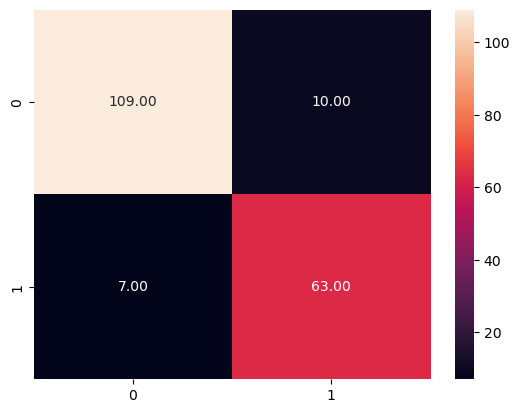

In [95]:
sns.heatmap(confusion_matrix(y_test, stack.predict(X_test)), annot = True, fmt = ".2f")